Text(0.5, 1.0, 'Correlation Heatmap of Boston Housing Features')

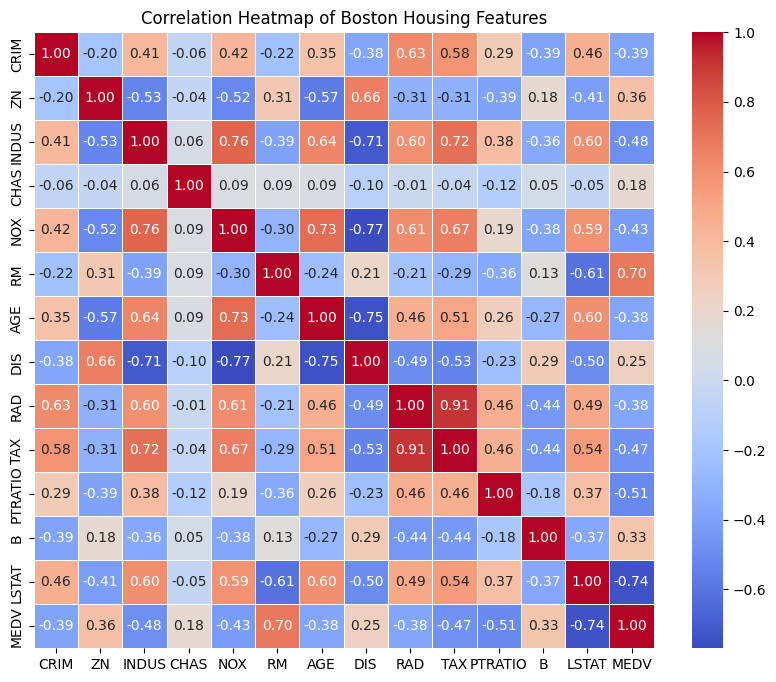

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('boston_house_prices.csv', skiprows=1)

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Boston Housing Features')

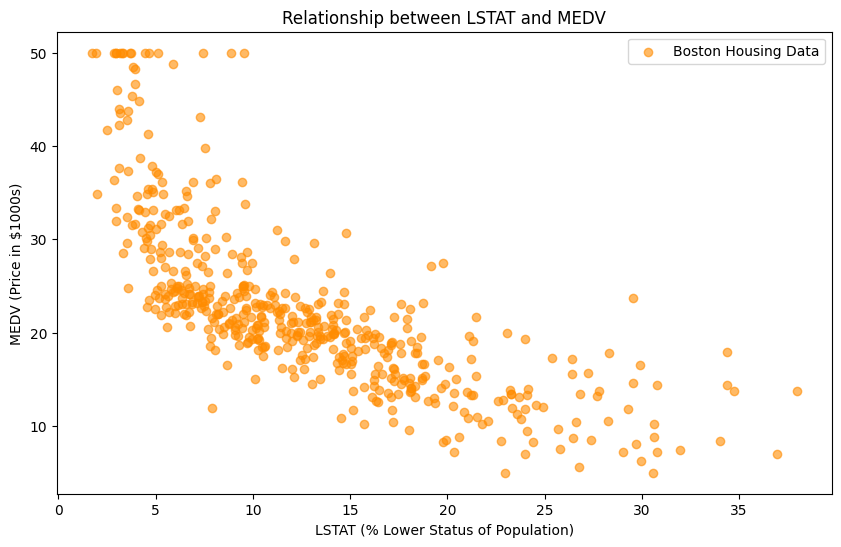

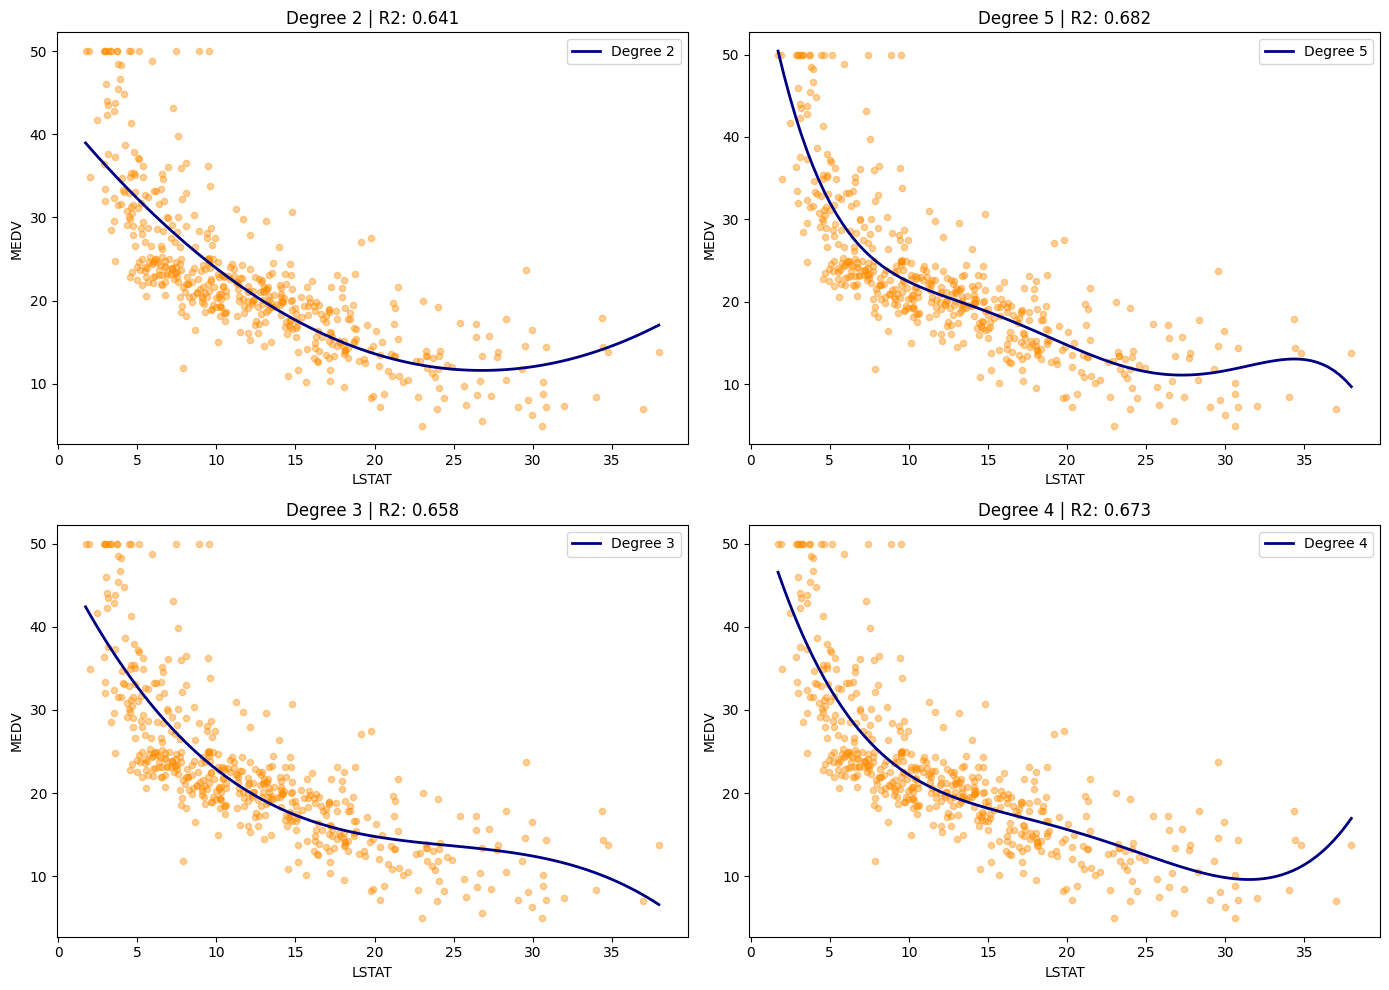

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('boston_house_prices.csv', skiprows=1)

X = df[['LSTAT']].values
y = df['MEDV'].values

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', alpha=0.6, label='Boston Housing Data')
plt.title('Relationship between LSTAT and MEDV')
plt.xlabel('LSTAT (% Lower Status of Population)')
plt.ylabel('MEDV (Price in $1000s)')
plt.legend()
plt.savefig('boston_scatter.png')

# part 2
degrees = [2, 5, 3, 4]
plt.figure(figsize=(14, 10))


for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i + 1)
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    X_range_poly = poly.transform(X_range)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_range_pred = model.predict(X_range_poly)
    y_pred = model.predict(X_poly)
    
    plt.scatter(X, y, s=20, color='darkorange', alpha=0.4)
    plt.plot(X_range, y_range_pred, color='navy', linewidth=2, label=f'Degree {degree}')
    plt.title(f'Degree {degree} | R2: {r2_score(y, y_pred):.3f}')
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.legend()

plt.tight_layout()
plt.savefig('boston_poly_regression.png')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(f"Train R2: {r2_score(y_train, y_train_pred)}")
print(f"Test R2: {r2_score(y_test, y_test_pred)}")
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
error = train - test
print(error)

Train R2: 0.6953165010243729
Test R2: 0.6304501405194103
0.06486636050496264
